Pasta atual: train_audio
Pasta atual: train_audio\asbfly
New sampling rate =  32000


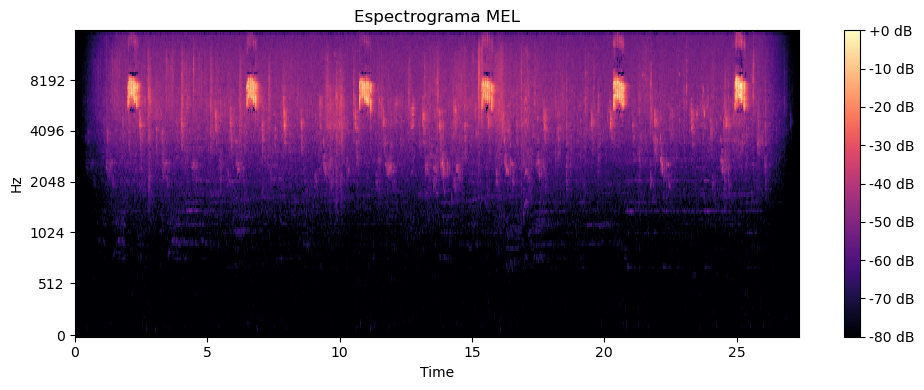

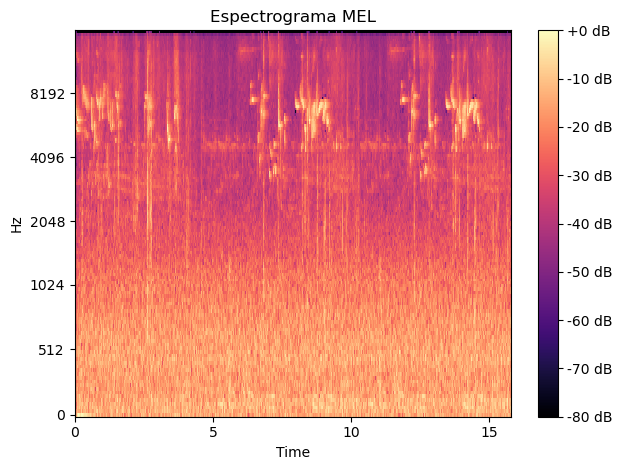

KeyboardInterrupt: 

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd

# Percorre recursivamente todas as pastas e subpastas dentro do diretório base de áudio
should_plot = True

plt.figure(figsize=(10, 4))
for i in range(2):
  if (i==0):
    diretorio_base_audio = 'train_audio'
    diretorio_base_imagens = 'train_features'
  if (i==1):
    diretorio_base_audio = 'unlabeled_soundscapes'
    diretorio_base_imagens = 'test_features'
    
  last_sr = -1 # sampling rate

  for pasta_atual, subpastas, arquivos in os.walk(diretorio_base_audio):
      print(f"Pasta atual: {pasta_atual}")
      # Itera sobre todos os arquivos encontrados na pasta atual
      for arquivo in arquivos:
          # Caminho completo para o arquivo atual
          caminho_arquivo = os.path.join(pasta_atual, arquivo)

          # Verifica se o arquivo é um arquivo de áudio .ogg
          if caminho_arquivo.endswith(('.ogg')):

              # Carrega o arquivo de áudio usando librosa
              audio, sr = librosa.load(caminho_arquivo, sr=None)
              if sr != last_sr:
                 last_sr = sr
                 print("New sampling rate = ", sr)

              # Calcula o espectrograma MEL
              espectrograma_mel = librosa.feature.melspectrogram(y=audio, sr=sr)

              # Converte o espectrograma MEL para decibéis (dB)
              espectrograma_mel_db = librosa.power_to_db(espectrograma_mel, ref=np.max)

              # Plota o espectrograma MEL
              if should_plot:                
                librosa.display.specshow(espectrograma_mel_db, sr=sr, x_axis='time', y_axis='mel')
                plt.colorbar(format='%+2.0f dB')
                plt.title('Espectrograma MEL')
                plt.tight_layout()
                plt.show()

                # Play the audio file
                sd.play(audio, sr)

                # Use this to pause until the file is done playing
                sd.wait()
              # Obtém o caminho da pasta de saída para as imagens seguindo a mesma estrutura de diretórios do áudio
              pasta_saida_imagens = os.path.join(diretorio_base_imagens, os.path.relpath(pasta_atual, diretorio_base_audio))

              # Cria a pasta de saída para as imagens se não existir
              if not os.path.exists(pasta_saida_imagens):
                  os.makedirs(pasta_saida_imagens)

              # Salva o espectrograma MEL como uma imagem nas pastas
              nome_saida_imagem = os.path.splitext(arquivo)[0] + '_espectrograma_mel.png'
              caminho_saida_imagem = os.path.join(pasta_saida_imagens, nome_saida_imagem)
              plt.savefig(caminho_saida_imagem)
              plt.close()